In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('carclaims.csv')
print(df.shape)
df.head()

(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [3]:
df.drop('PolicyNumber', axis=1, inplace=True)
df.shape

(15420, 32)

In [4]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  RepNumber             15420 non-null

### Target

FraudFound
No     14497
Yes      923
Name: count, dtype: int64


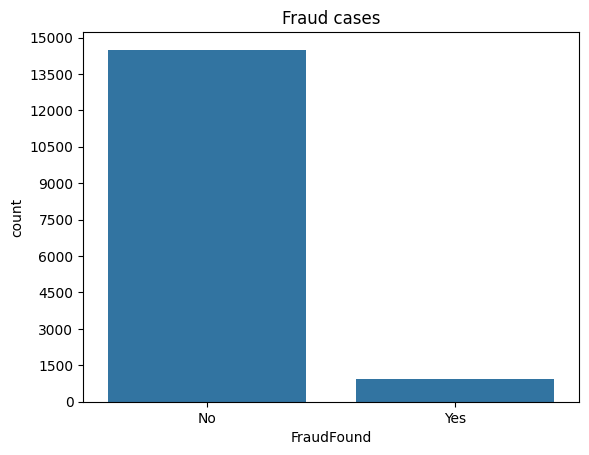

In [6]:
print(df['FraudFound'].value_counts())
sns.countplot(data=df, x='FraudFound')
plt.title('Fraud cases')
plt.yticks(np.arange(0, 16000, 1500))
plt.show()

Need to oversample minority class: "Yes" FraudFound to achieve class balance

### Missing data

In [7]:
missing = [var for var in df.columns if df[var].isnull().sum() > 0]
missing

[]

### Variable Type

#### Numerical

In [8]:
num_var = [var for var in df.columns if df[var].dtype != 'O']
print(len(num_var))
num_var

7


['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

#### Numerical - Discrete

In [9]:
discrete_var = [var for var in num_var if len(df[var].unique()) < 20 and 'Year' not in var]
print(len(discrete_var), 'discrete vars')
df[discrete_var].head()

5 discrete vars


,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating
0,5,1,12,300,1
1,3,4,15,400,4
2,5,2,7,400,3
3,2,1,4,400,2
4,5,2,3,400,1


#### Numerical - Continuous

In [10]:
cont_var = [var for var in num_var if var not in discrete_var]
print(len(cont_var), 'continuous vars')
df[cont_var].head()

2 continuous vars


,Age,Year
0,21,1994
1,34,1994
2,47,1994
3,65,1994
4,27,1994


Year
1994    6142
1995    5195
1996    4083
Name: FraudFound, dtype: int64


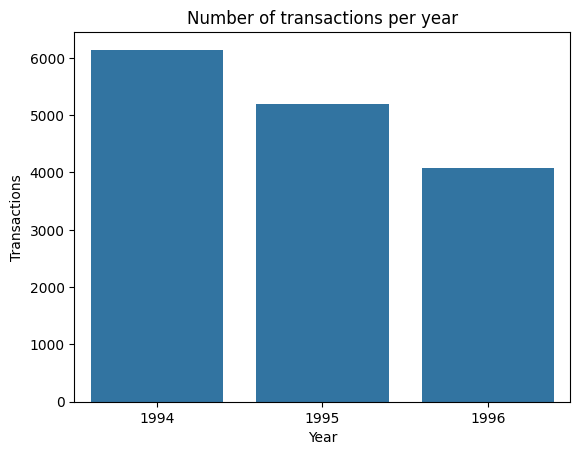

In [11]:
print(df.groupby("Year")['FraudFound'].size())
sns.countplot(data=df, x='Year')
plt.ylabel('Transactions')
plt.title('Number of transactions per year')
plt.yticks(np.arange(0,7000,1000))
plt.show()

Year  FraudFound
1994  No            5733
      Yes            409
1995  No            4894
      Yes            301
1996  No            3870
      Yes            213
dtype: int64


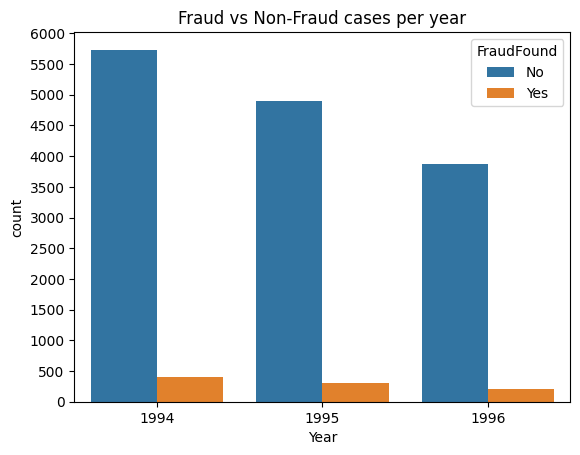

In [12]:
print(df.groupby(['Year','FraudFound']).size())
sns.countplot(data=df, x='Year', hue='FraudFound')
plt.title('Fraud vs Non-Fraud cases per year')
plt.yticks(np.arange(0,6500,500))
plt.show()

Transactions are decreasing per year for both non-fraud and fraud cases

WeekOfMonthClaimed
1    3450
2    3720
3    3583
4    3433
5    1234
Name: FraudFound, dtype: int64


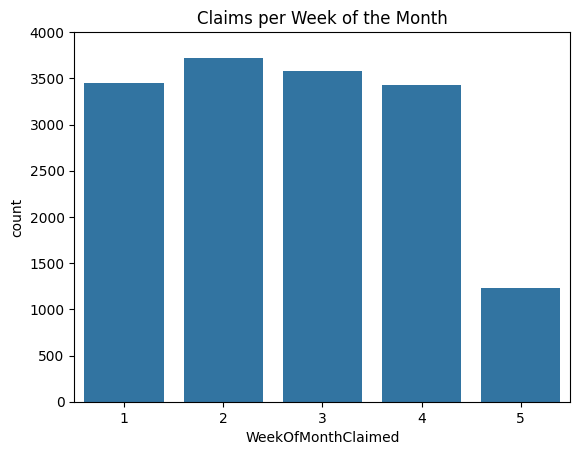

In [13]:
print(df.groupby('WeekOfMonthClaimed')['FraudFound'].size())
sns.countplot(data=df, x='WeekOfMonthClaimed')
plt.title('Claims per Week of the Month')
plt.yticks(np.arange(0, 4500, 500))
plt.show()

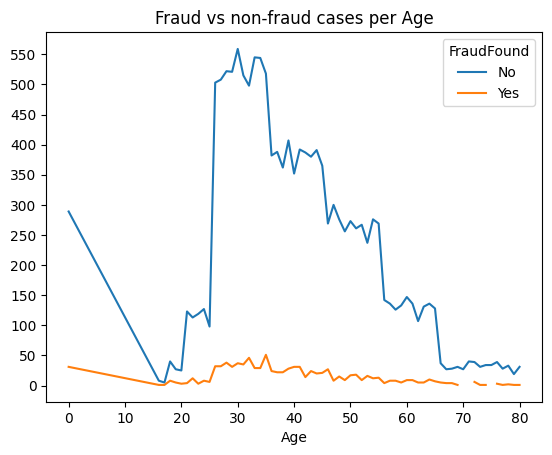

In [14]:
#df.groupby(['Age','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='line')
df.groupby(['Age','FraudFound']).size().unstack('FraudFound').plot(kind='line')
plt.title('Fraud vs non-fraud cases per Age')
plt.yticks(np.arange(0, 600, 50))
plt.show()

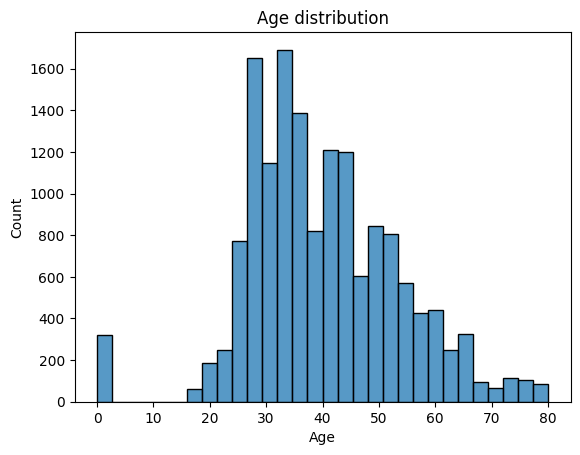

In [78]:
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

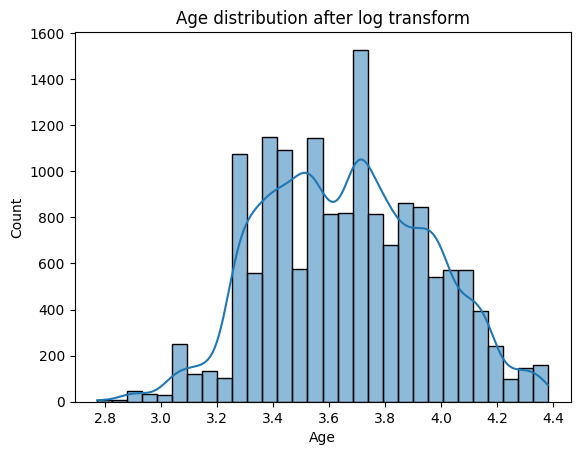

In [77]:
tmp = df.copy()
df_nonzero_mean = df[df['Age'] > 0]['Age'].mean()
tmp['Age'] = tmp['Age'].replace(0, df_nonzero_mean)
tmp['Age'] = np.log(tmp['Age'])
sns.histplot(data=tmp, x='Age', bins=30, kde=True)
plt.title('Age distribution after log transform')
plt.xlabel('Age')
plt.show()

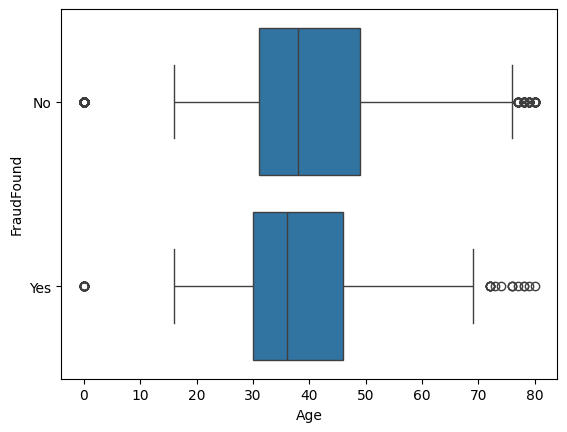

In [16]:
sns.boxplot(data=df, x='Age', y='FraudFound')
plt.show()

In [17]:
f"{len(df[df['Age'] < 1])} data points have an Age of less than 1."

'320 data points have an Age of less than 1.'

Age distribution is a bit right-skewed with a concentration of values toward the younger ages and a long tail toward the older ages.

Need to impute Age = 0 with the mean of the Age column excluding Age = 0, and it might be better to test transformations and decrease skewness before discretisation.

DriverRating
1    232
2    214
3    242
4    235
dtype: int64


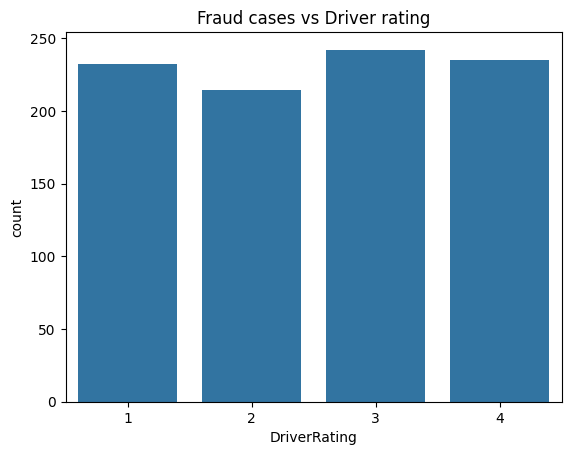

In [18]:
print(df.groupby(['DriverRating','FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='DriverRating')
plt.title('Fraud cases vs Driver rating')
plt.show()

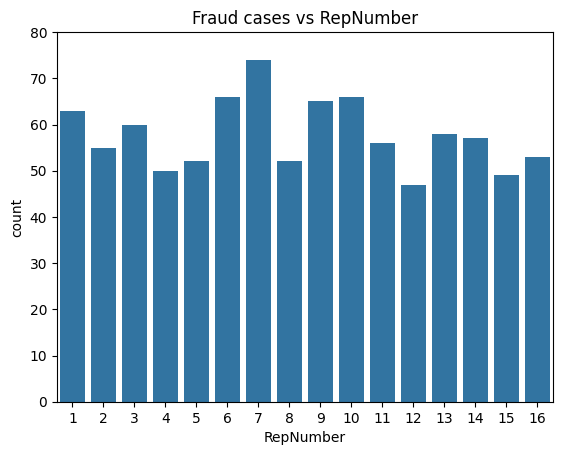

In [19]:
sns.countplot(data=df[df['FraudFound']=='Yes'], x='RepNumber')
plt.title('Fraud cases vs RepNumber')
plt.yticks(np.arange(0, 85, 10))
plt.show()

Deductible
300      2
400    856
500     47
700     18
dtype: int64


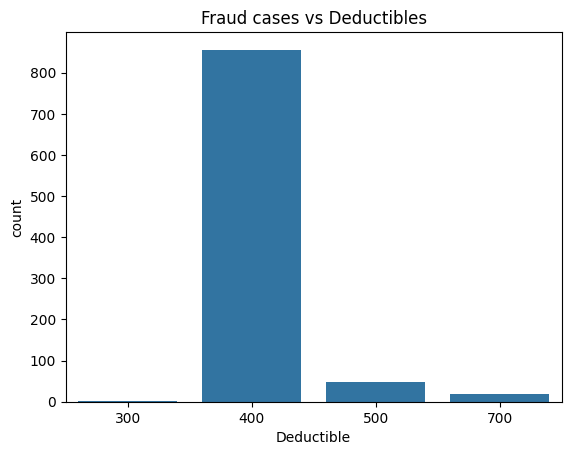

In [20]:
print(df.groupby(['Deductible','FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='Deductible')
plt.title('Fraud cases vs Deductibles')
plt.show()

Most of the fraudulent cases have a deductible of 400. Might need to binarise this as the distribution is too imbalance, but depending on the model to use and future data, it might be better to leave it as it is for tree-based models or GBMs (gradient boosting machines).

#### Categorical

In [21]:
cat_var = [var for var in df.columns if var not in num_var and var != 'FraudFound']
print(len(cat_var))
cat_var

24


['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy']

In [80]:
df[cat_var].head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,Sport,"more than 69,000",more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,Sport,"more than 69,000",more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,Sport,"more than 69,000",more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,Sport,"more than 69,000",more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


Make
Accura        59
BMW            1
Chevrolet     94
Dodge          2
Ford          33
Honda        179
Mazda        123
Mecedes        1
Mercury        6
Nisson         1
Pontiac      213
Saab          11
Saturn         6
Toyota       186
VW             8
dtype: int64


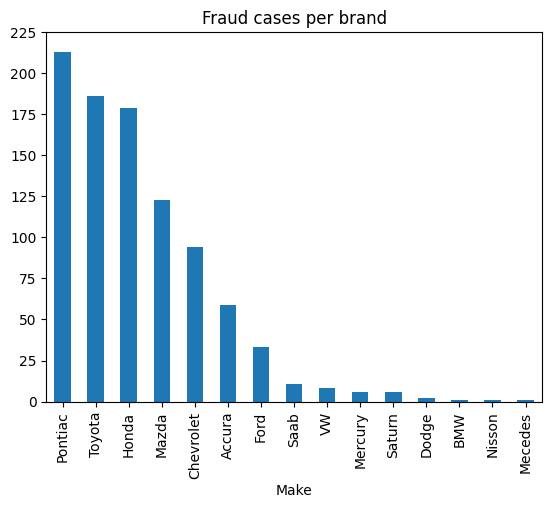

In [22]:
print(df.groupby(['Make', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['Make', 'FraudFound']).size().xs('Yes', level='FraudFound').sort_values(ascending=False).plot(kind='bar')
plt.title('Fraud cases per brand')
plt.yticks(np.arange(0, 250, 25))
plt.show()

AccidentArea
Rural    133
Urban    790
dtype: int64


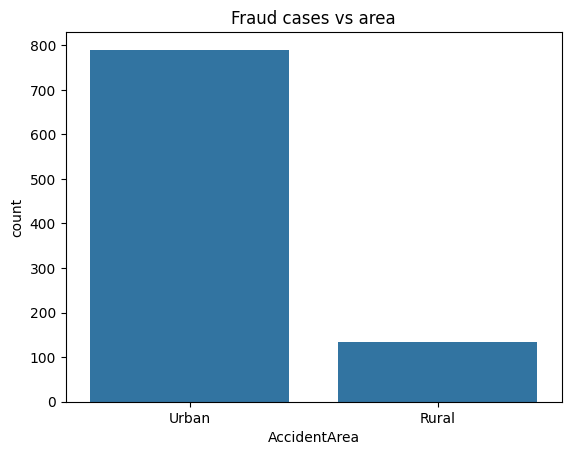

In [23]:
print(df.groupby(['AccidentArea', 'FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='AccidentArea')
plt.title('Fraud cases vs area')
plt.show()

Most of the accidents happen in urban areas

DayOfWeekClaimed
Sunday         3
Monday       216
Tuesday      198
Wednesday    188
Thursday     144
Friday       164
Saturday      10
dtype: int64


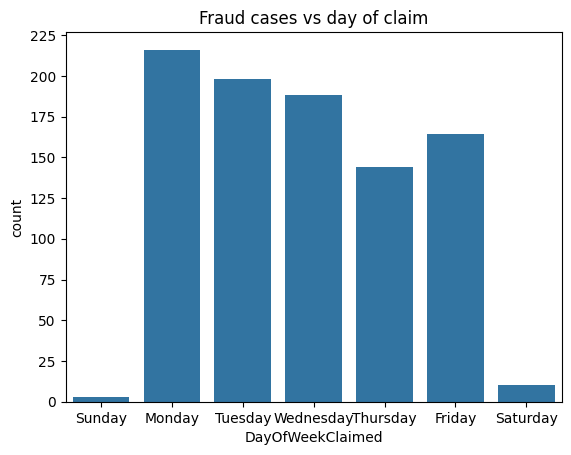

In [24]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print(df.groupby(['DayOfWeekClaimed', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(days_order))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='DayOfWeekClaimed', order=days_order)
plt.title('Fraud cases vs day of claim')
plt.yticks(np.arange(0, 250, 25))
plt.show()

Majority of the claims happen on weekdays

MonthClaimed
Jan    92
Feb    78
Mar    97
Apr    82
Jun    78
Jul    56
Aug    92
Sep    78
Oct    73
Nov    46
Dec    49
dtype: int64


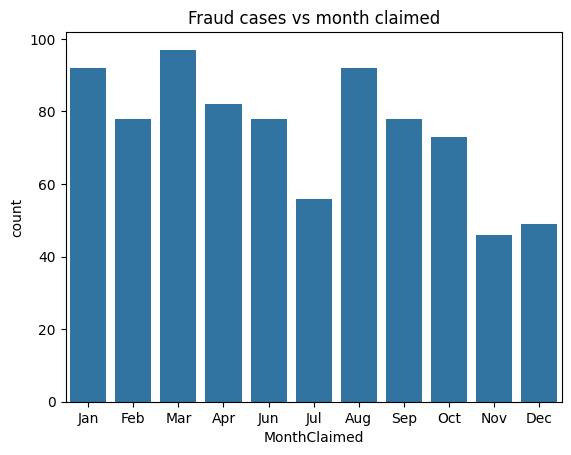

In [25]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(df.groupby(['MonthClaimed', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(month_order))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='MonthClaimed', order=month_order)
plt.title('Fraud cases vs month claimed')
plt.show()

Sex
Female    105
Male      818
dtype: int64


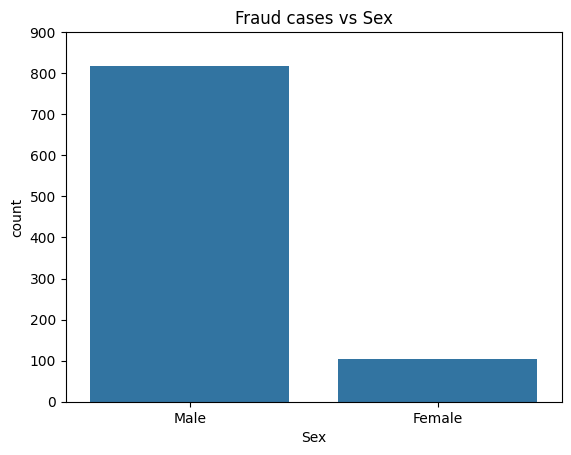

In [26]:
print(df.groupby(['Sex', 'FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='Sex')
plt.title('Fraud cases vs Sex')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

MaritalStatus
Divorced      3
Married     639
Single      278
Widow         3
dtype: int64


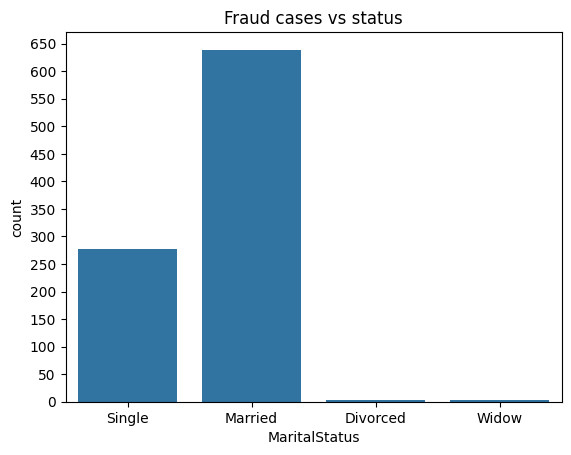

In [27]:
print(df.groupby(['MaritalStatus', 'FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='MaritalStatus')
plt.title('Fraud cases vs status')
plt.yticks(np.arange(0, 700, 50))
plt.show()

Fault
Policy Holder    886
Third Party       37
dtype: int64


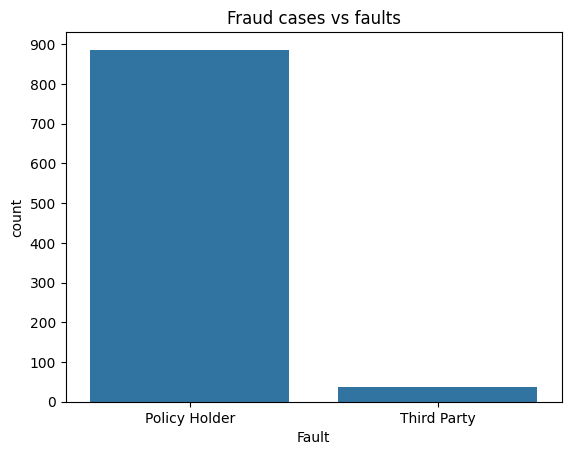

In [28]:
print(df.groupby(['Fault', 'FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='Fault')
plt.title('Fraud cases vs faults')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

Most of the fraud cases recorded are caused by the policy holder of the insurance

PolicyType
Sedan - All Perils      411
Sedan - Collision       384
Sedan - Liability        36
Sport - Collision        48
Utility - All Perils     41
Utility - Collision       3
dtype: int64


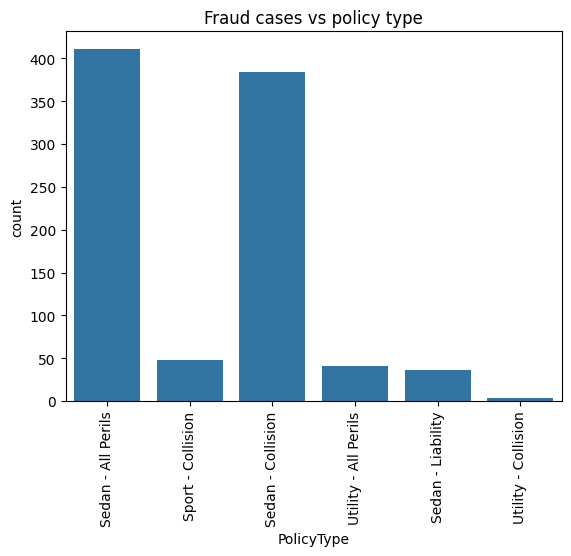

In [29]:
print(df.groupby(['PolicyType', 'FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='PolicyType')
plt.title('Fraud cases vs policy type')
plt.xticks(rotation=90)
plt.show()

VehicleCategory
Sedan      795
Sport       84
Utility     44
dtype: int64


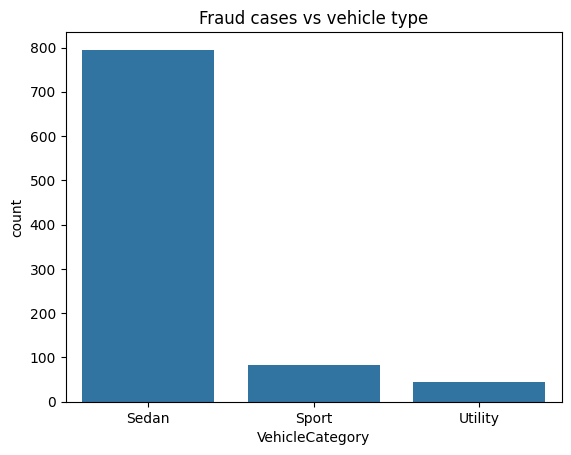

In [30]:
print(df.groupby(['VehicleCategory', 'FraudFound']).size().xs('Yes', level='FraudFound'))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='VehicleCategory')
plt.title('Fraud cases vs vehicle type')
plt.show()

All Perils and Collision policies are the most popular and sedan is the majority of the cars

VehiclePrice
less than 20,000    103
20,000 to 29,000    421
30,000 to 39,000    175
40,000 to 59,000     31
60,000 to 69,000      4
more than 69,000    189
dtype: int64


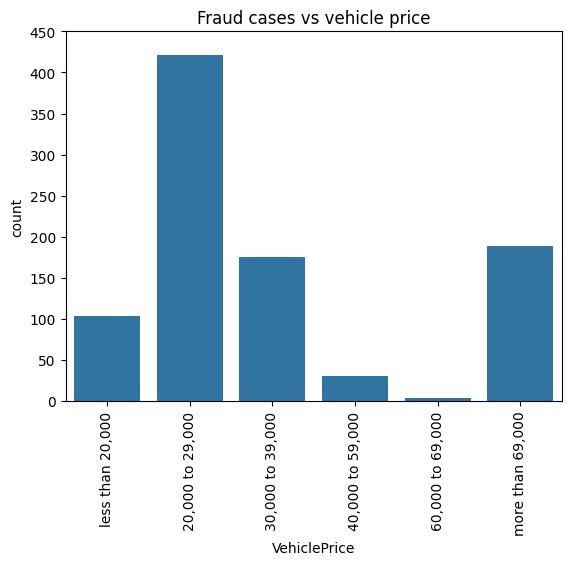

In [31]:
price_order = ['less than 20,000', '20,000 to 29,000', '30,000 to 39,000', '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000']
print(df.groupby(['VehiclePrice', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(price_order))
sns.countplot(data=df[df['FraudFound']=='Yes'], x='VehiclePrice', order=price_order)
plt.title('Fraud cases vs vehicle price')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 460, 50))
plt.show()

VehiclePrice          20,000 to 29,000  30,000 to 39,000  40,000 to 59,000  \
PolicyType                                                                   
Sedan - All Perils                2061               658                78   
Sedan - Collision                 3374              1386               159   
Sedan - Liability                 2637              1477               183   
Sport - All Perils                   6                 3                 0   
Sport - Collision                    0                 0                 0   
Sport - Liability                    0                 0                 0   
Utility - All Perils                 0                 9                35   
Utility - Collision                  1                 0                 4   
Utility - Liability                  0                 0                 2   

VehiclePrice          60,000 to 69,000  less than 20,000  more than 69,000  
PolicyType                                                      

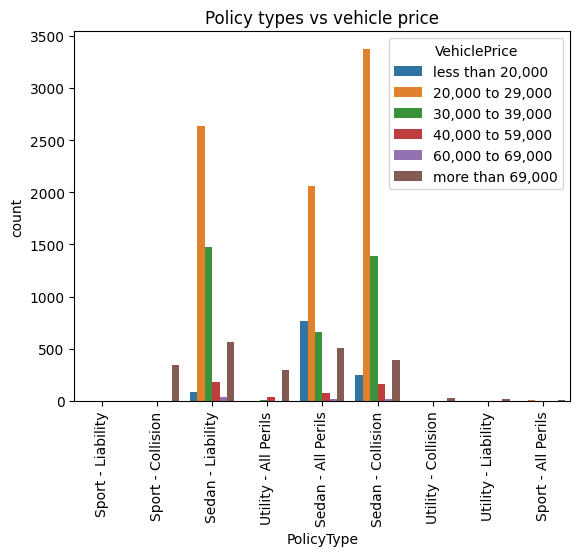

In [32]:
print(df.groupby(['PolicyType', 'VehiclePrice']).size().unstack(fill_value=0))
sns.countplot(data=df, x='PolicyType', hue='VehiclePrice', hue_order=price_order)
plt.title('Policy types vs vehicle price')
plt.xticks(rotation=90)
plt.show()

Fault                 Policy Holder  Third Party
PolicyType                                      
Sedan - All Perils             2473         1614
Sedan - Collision              3953         1631
Sedan - Liability              4262          725
Sport - All Perils               17            5
Sport - Collision               169          179
Sport - Liability                 1            0
Utility - All Perils            307           33
Utility - Collision              29            1
Utility - Liability              19            2


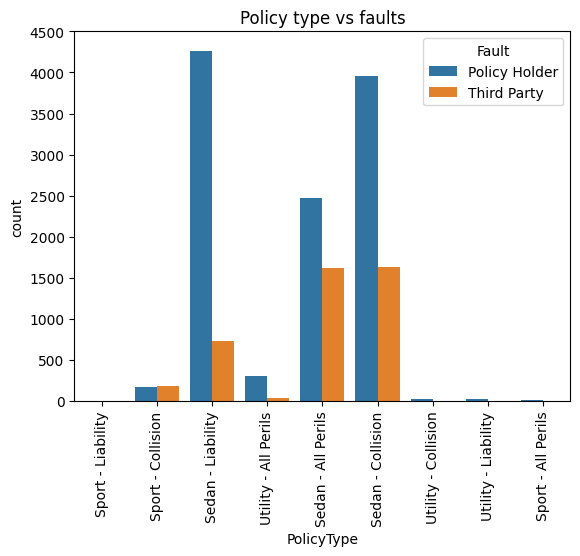

In [33]:
print(df.groupby(['PolicyType', 'Fault']).size().unstack(fill_value=0))
sns.countplot(data=df, x='PolicyType', hue='Fault')
plt.title('Policy type vs faults')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 4600, 500))
plt.show()

Days:Policy-Accident
1 to 7            1
15 to 30          3
8 to 15           5
more than 30    905
none              9
dtype: int64


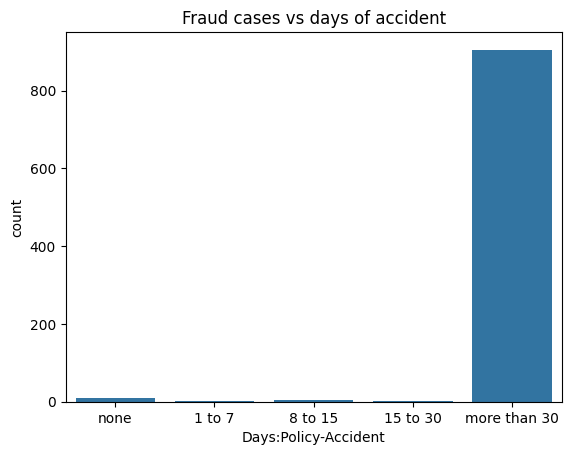

In [87]:
print(df.groupby(['Days:Policy-Accident', 'FraudFound']).size().xs('Yes', level='FraudFound'))
accident_order = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
sns.countplot(data=df[df['FraudFound']=='Yes'], x='Days:Policy-Accident', order=accident_order)
plt.title('Fraud cases vs days of accident')
plt.show()

The frequency of the category 'more than 30' dwarfs other categories for both non-fraud and fraud claims. Binarising this variable (0, 1) might be beneficial instead of ordinal encoding.

Days:Policy-Claim
15 to 30          6
8 to 15           3
more than 30    914
dtype: int64


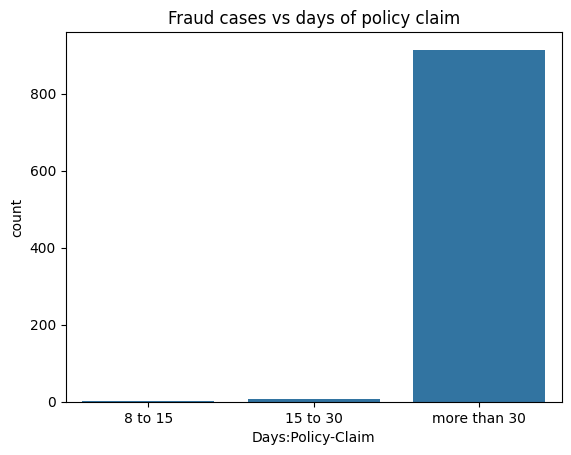

In [35]:
print(df.groupby(['Days:Policy-Claim', 'FraudFound']).size().xs('Yes', level='FraudFound'))
claim_order = ['8 to 15', '15 to 30', 'more than 30']
sns.countplot(data=df[df['FraudFound']=='Yes'], x='Days:Policy-Claim', order=claim_order)
plt.title('Fraud cases vs days of policy claim')
plt.show()

Fraud case record instances and claims happen more than 30 days of the accident

PastNumberOfClaims
1              222
2 to 4         294
more than 4     68
none           339
dtype: int64


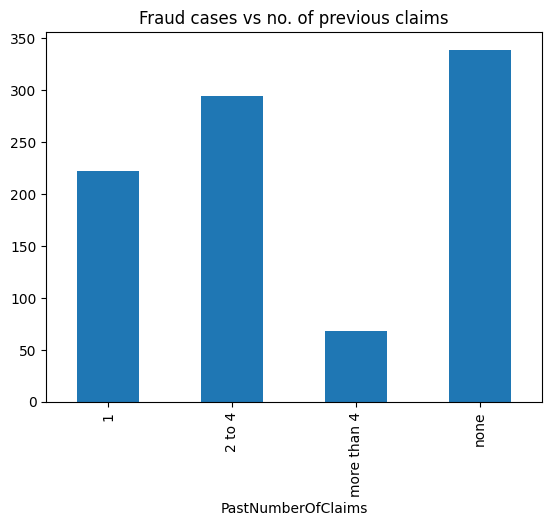

In [36]:
print(df.groupby(['PastNumberOfClaims', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['PastNumberOfClaims', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs no. of previous claims')
plt.show()

AgeOfVehicle
2 years          3
3 years         13
4 years         21
5 years         95
6 years        228
7 years        325
more than 7    206
new             32
dtype: int64


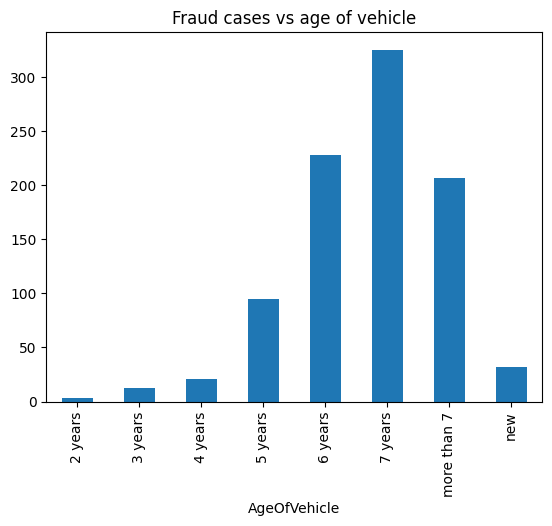

In [37]:
print(df.groupby(['AgeOfVehicle', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['AgeOfVehicle', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs age of vehicle')
plt.show()

Most policy holders that commit fraud claims have a 7-year-old vehicle

AgeOfPolicyHolder
16 to 17     31
18 to 20      2
21 to 25     16
26 to 30     33
31 to 35    360
36 to 40    237
41 to 50    144
51 to 65     70
over 65      30
dtype: int64


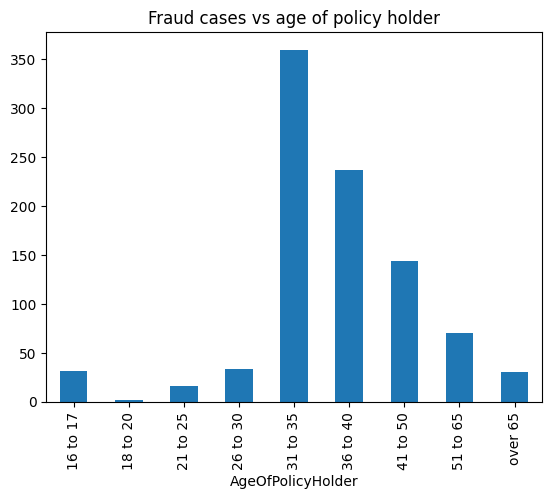

In [38]:
print(df.groupby(['AgeOfPolicyHolder', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['AgeOfPolicyHolder', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs age of policy holder')
plt.show()

In [39]:
df_yes = df[(df['FraudFound'] == 'Yes') 
   & (df['PoliceReportFiled'] == 'Yes') 
   & (df['WitnessPresent'] == 'Yes')]
df_yes.groupby(['PoliceReportFiled', 'WitnessPresent', 'AgentType']).size()


PoliceReportFiled  WitnessPresent  AgentType
Yes                Yes             External     1
dtype: int64

In [40]:
df_no = df[(df['FraudFound'] == 'Yes') 
   & (df['PoliceReportFiled'] == 'No') 
   & (df['WitnessPresent'] == 'No')]
df_no.groupby(['PoliceReportFiled', 'WitnessPresent', 'AgentType']).size()


PoliceReportFiled  WitnessPresent  AgentType
No                 No              External     901
                                   Internal       4
dtype: int64

NumberOfSuppliments
1 to 2         159
3 to 5          97
more than 5    195
none           472
dtype: int64


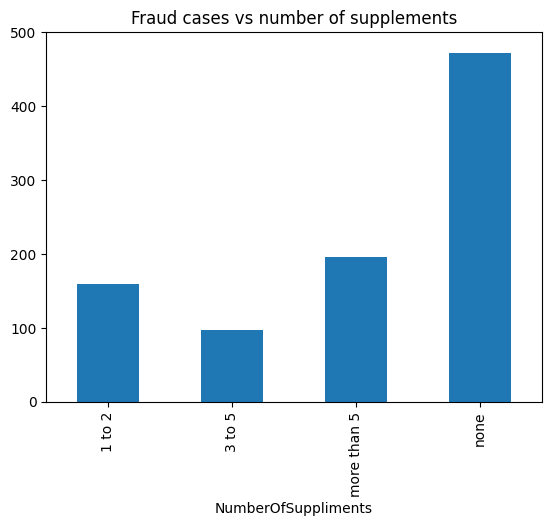

In [41]:
print(df.groupby(['NumberOfSuppliments', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['NumberOfSuppliments', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs number of supplements')
plt.yticks(np.arange(0, 600, 100))
plt.show()

AddressChange-Claim
1 year             11
2 to 3 years       51
4 to 8 years       33
no change         825
under 6 months      3
dtype: int64


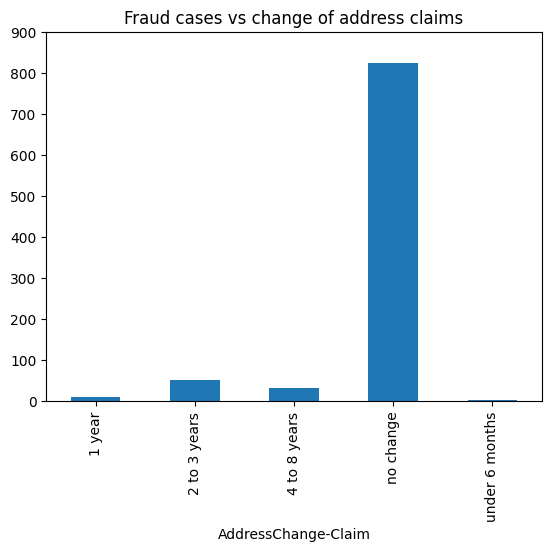

In [42]:
print(df.groupby(['AddressChange-Claim', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['AddressChange-Claim', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs change of address claims')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

 Most fraud cases have no records of address changes when claiming

NumberOfCars
1 vehicle     850
2 vehicles     43
3 to 4         29
5 to 8          1
dtype: int64


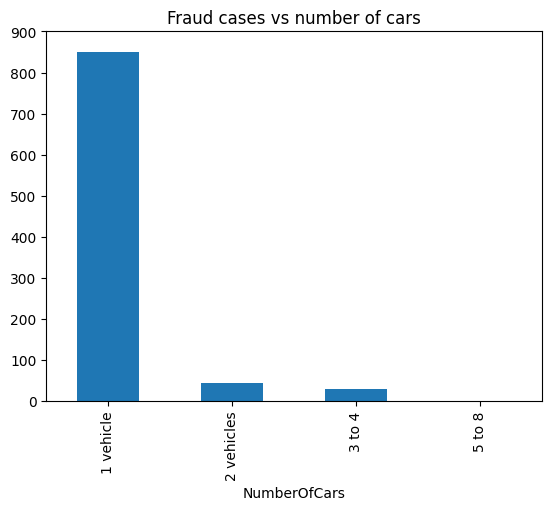

In [43]:
print(df.groupby(['NumberOfCars', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['NumberOfCars', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs number of cars')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

BasePolicy
All Perils    452
Collision     435
Liability      36
dtype: int64


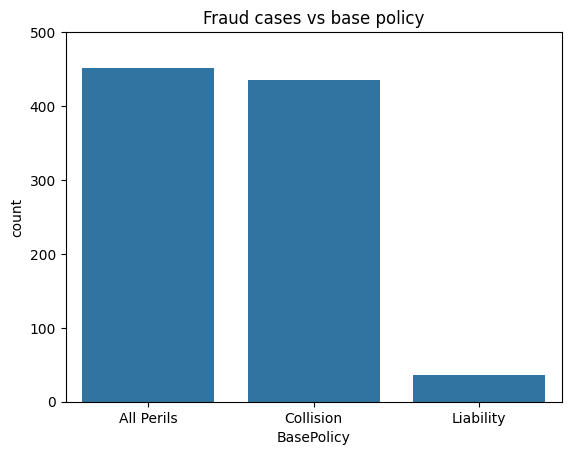

In [44]:
print(df.groupby(['BasePolicy', 'FraudFound']).size().xs('Yes', level='FraudFound'))
#df.groupby(['BasePolicy', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
sns.countplot(data=df[df['FraudFound']=='Yes'], x='BasePolicy')
plt.title('Fraud cases vs base policy')
plt.yticks(np.arange(0, 550, 100))
plt.show()

VehicleCategory  Sedan  Sport  Utility
BasePolicy                            
All Perils        4087     22      340
Collision         5584    348       30
Liability            0   4988       21


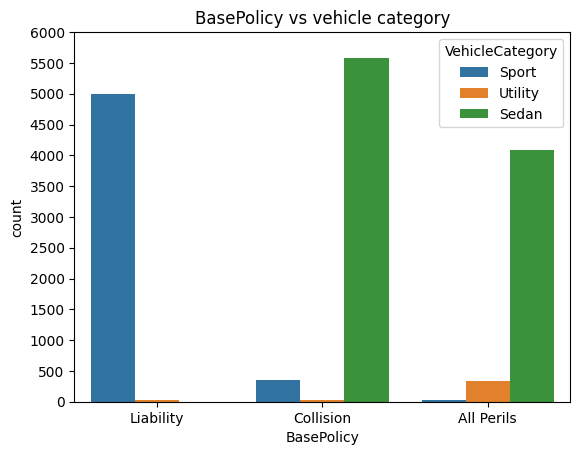

In [45]:
print(df.groupby(['BasePolicy', 'VehicleCategory']).size().unstack(fill_value=0))
sns.countplot(data=df, x='BasePolicy', hue='VehicleCategory')
plt.title('BasePolicy vs vehicle category')
plt.yticks(np.arange(0, 6500, 500))
plt.show()

Sedans are the most popular for collision and all perils policies. Sports cars have liability as the underlying base policy

AgeOfVehicle  2 years  3 years  4 years  5 years  6 years  7 years  \
BasePolicy                                                           
All Perils         15       50       68      338      844     1553   
Collision          44       70      105      627     1494     2159   
Liability          14       32       56      392     1110     2095   

AgeOfVehicle  more than 7  new  
BasePolicy                      
All Perils           1445  136  
Collision            1383   80  
Liability            1153  157  


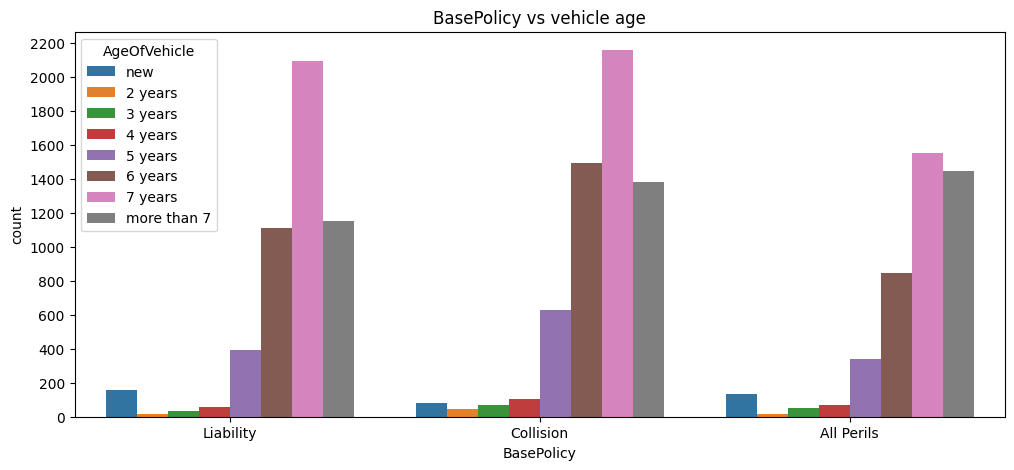

In [46]:
print(df.groupby(['BasePolicy', 'AgeOfVehicle']).size().unstack(fill_value=0))
age_vehicle_order = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='BasePolicy', hue='AgeOfVehicle', hue_order=age_vehicle_order)
plt.title('BasePolicy vs vehicle age')
plt.yticks(np.arange(0, 2400, 200))
plt.show()

### Cardinality

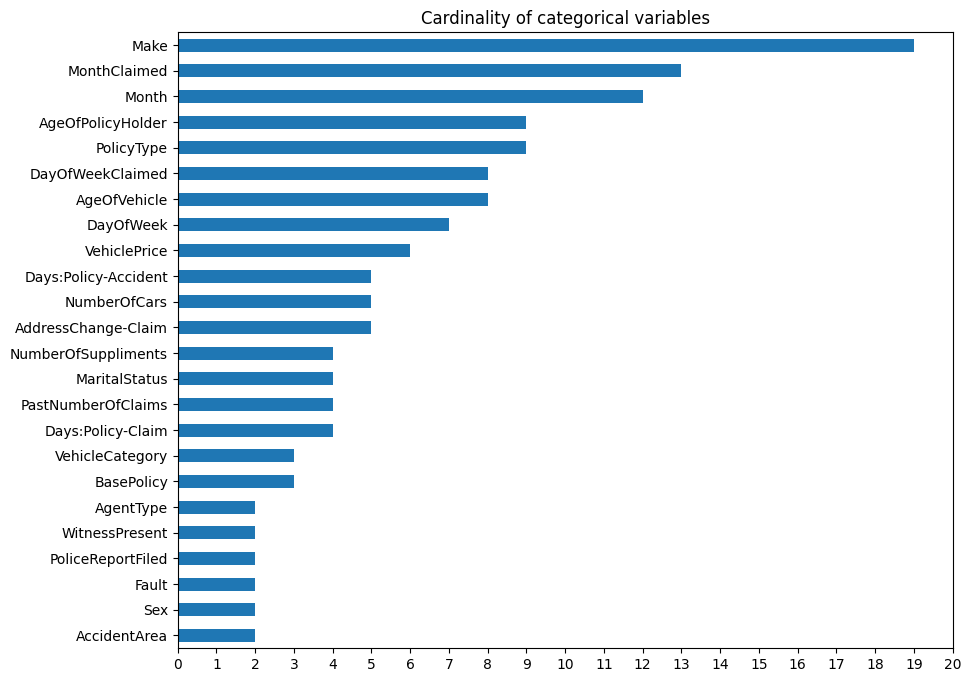

In [47]:
df[cat_var].nunique().sort_values().plot(kind='barh', figsize=(10,8))
plt.xticks(np.arange(0, 21, 1))
plt.title('Cardinality of categorical variables')
plt.show()

All categorical variables have low cardinality (<25) and these can be one-hot encoded or label encoded depending on the type of data.